Data Exploration

In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [29]:
#carregando o dataset 
df = pd.read_csv('E:/00_Bootcamp_Infnet/06_Final_Project_INFNET/customer-segmentation-dataset/Mall_Customers.csv') 

In [30]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [31]:
df.drop('CustomerID', axis = 1, inplace = True) # dropando costumer ID

In [32]:
df = df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'}) #renomando as colunas 

In [33]:
df.columns = df.columns.str.lower()

In [34]:
df.head()

,gender,age,annual_income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [35]:
#info verificando se existem dados faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


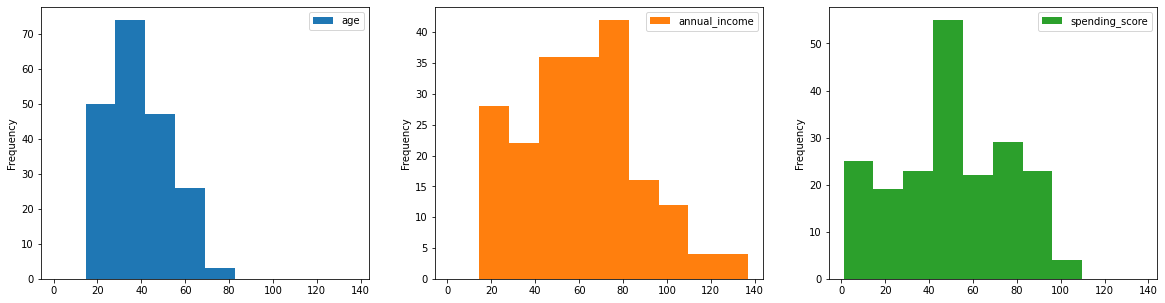

In [36]:
#Histograma dos dados 
fig,ax = plt.subplots(1,3,figsize=(20,5))
df.plot(kind='hist',ax=ax, subplots=True, bins=10)
plt.show()

In [37]:
df.groupby("gender").age.agg('count')


gender
Female    112
Male       88
Name: age, dtype: int64

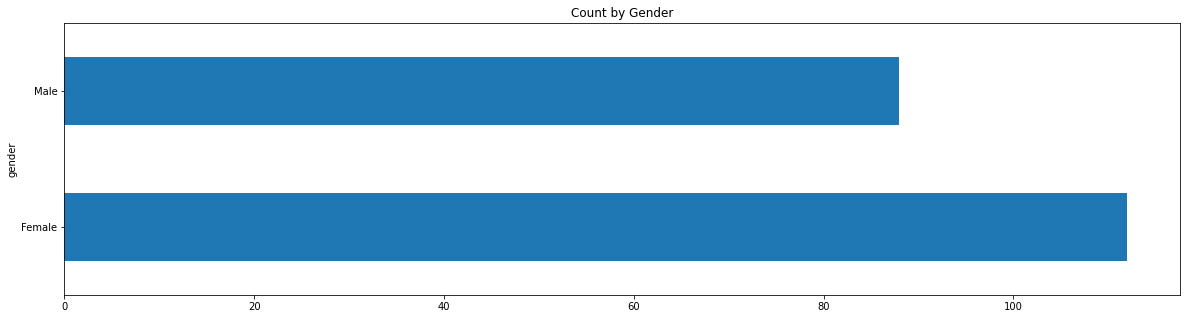

In [39]:
fig,ax=plt.subplots(1,1,figsize=(20,5))
df.groupby("gender").age.agg('count').plot(kind='barh',ax=ax).set_title('Count by Gender')
plt.show()

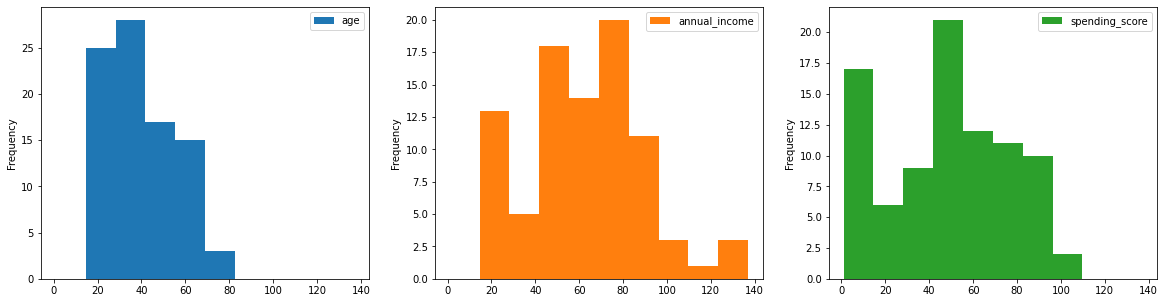

In [41]:
#Histograma_Homens 
fig,ax = plt.subplots(1,3,figsize=(20, 5))
sdf = df.groupby(by='gender')
sdf.get_group("Male").plot(kind='hist',ax=ax, subplots=True, bins=10)
plt.show()

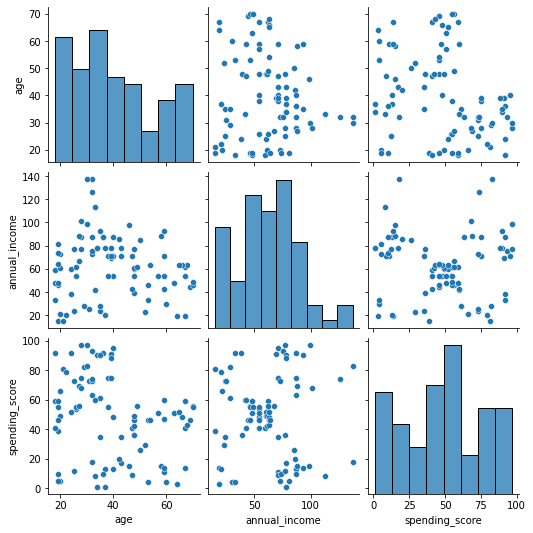

In [42]:
sns.pairplot(sdf.get_group("Male"))
plt.show()

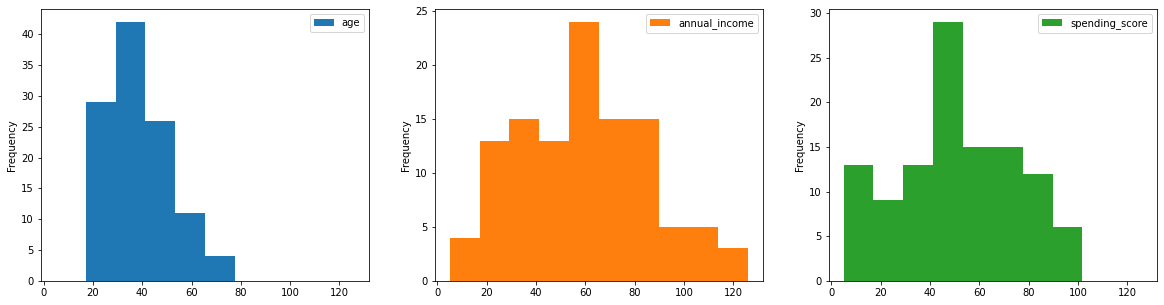

In [43]:
#histograma_Mulheres
fig,ax = plt.subplots(1,3,figsize=(20, 5))
sdf2 = df.groupby(by='gender')
sdf2.get_group("Female").plot(kind='hist',ax=ax, subplots=True, bins=10)
plt.show()

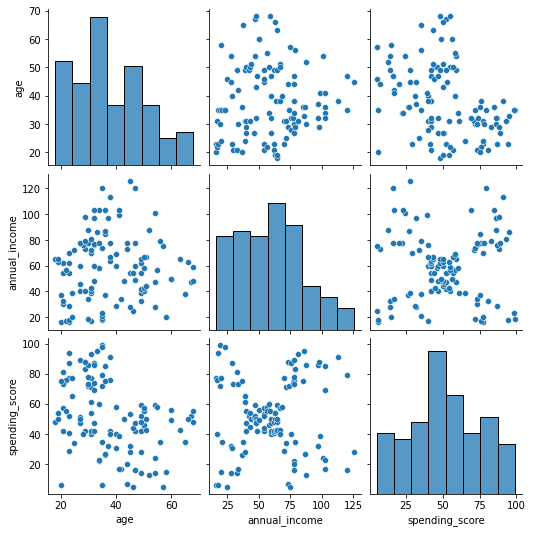

In [44]:
sns.pairplot(sdf.get_group("Female"))
plt.show()

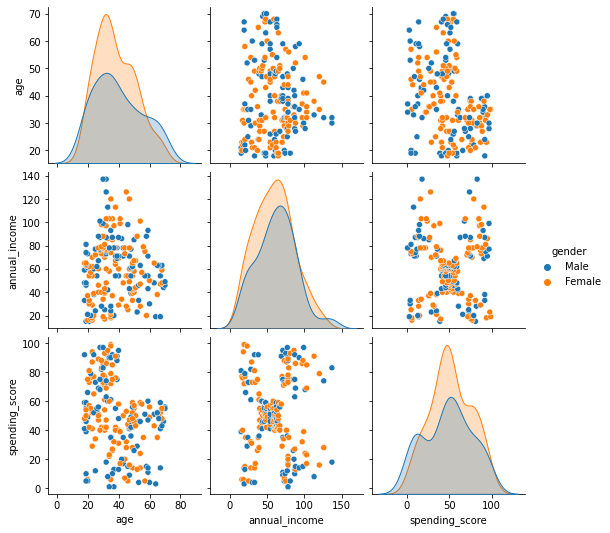

In [46]:
sns.pairplot(df ,hue="gender")
plt.show()

In [50]:
df1=pd.get_dummies(df, drop_first=True) 
#tranformando os generos em 0 e 1(drop first dropa a primera colula do dummie) 0 Mulher e 1 Homem
df1

,age,annual_income,spending_score,gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [53]:
df1 = df1.rename(columns={'gender_Male':'gender'}) 
df1.head(1)

,age,annual_income,spending_score,gender
0,19,15,39,1


In [55]:
df_age_income= df1[['age','annual_income']] 
df_age_spending= df1[['age','spending_score']] 
df_age_gender= df1[['age','gender']] #não será utilizado
df_score_income= df1[['spending_score','annual_income']] 
df_gender_score= df1[['gender','spending_score']]
df_gender_income= df1[['gender','annual_income']]

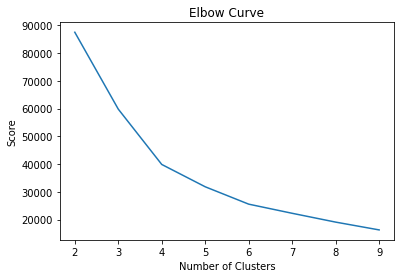

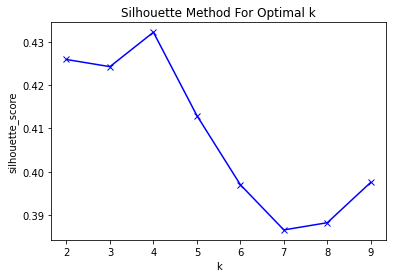

N_cluster: 2, score: 0.425953292753904
N_cluster: 3, score: 0.425111491552797
N_cluster: 4, score: 0.43208935577498
N_cluster: 5, score: 0.40380272213818524
N_cluster: 6, score: 0.396776517237133
N_cluster: 7, score: 0.38837755732878665
N_cluster: 8, score: 0.39362062036006606
N_cluster: 9, score: 0.3896155856619788


In [177]:
K_clusters = range(2,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = df_age_income[['age']]
X_axis = df_age_income[['annual_income']]
score = [kmeans[i].fit(df_age_income).inertia_ for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


sil = []
K_sil = range(2,10)
for k in K_sil:
    kmeans = KMeans(n_clusters = k).fit(df_age_income)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_age_income, labels, metric = 'euclidean')) 

#Visualization
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()


for i in range(2,10):
  kmeans_ = KMeans(n_clusters=i).fit(df_age_income)
  labels_ = kmeans_.labels_
  coef = silhouette_score(df_age_income,labels_)
  
  print("N_cluster: {}, score: {}".format(i,coef))

In [269]:
Y= np.array(df_age_income)
kmeans = KMeans(n_clusters=5, random_state=1).fit(Y)
kmeans.labels_
df_age_income['clusterlabels'] = kmeans.labels_

In [270]:
df_age_income.head(10)

,age,annual_income,clusterlabels
0,19,15,1
1,21,15,1
2,20,16,1
3,23,16,1
4,31,17,1
5,22,17,1
6,35,18,1
7,23,18,1
8,64,19,3
9,30,19,1


In [271]:
print(kmeans.cluster_centers_)

[[3.82586207e+01 7.81551724e+01 1.03448276e-01]
 [2.95365854e+01 2.72439024e+01 1.00000000e+00]
 [2.50645161e+01 5.94838710e+01 2.00000000e+00]
 [5.66200000e+01 4.84800000e+01 2.96000000e+00]
 [3.66000000e+01 1.09700000e+02 4.00000000e+00]]


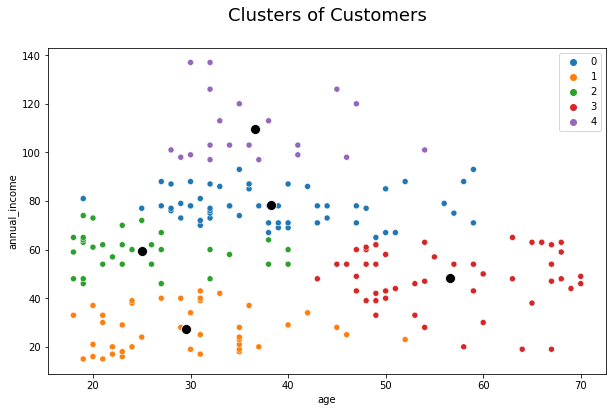

In [272]:
clusterlabels = df_age_income['clusterlabels']
plt.figure(figsize=(10, 6))
sns.scatterplot(df_age_income['age'], df_age_income['annual_income'],hue=clusterlabels,palette=sns.color_palette("tab10",5))
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'black', s = 100)
plt.title('Clusters of Customers\n', fontsize = 18)
plt.show()

Análise 01 - Pessoas com idades entre 30 e 60 possuem renda anual acima 90k confrome indicado no cluster 4 
No cluster 0 e 3 

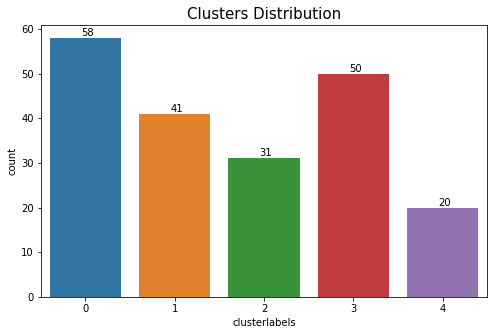

In [485]:
fig = plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_age_income,x='clusterlabels')
for p, label in zip(ax.patches, df_age_income['clusterlabels'].value_counts().sort_index()): 
    ax.annotate(label, (p.get_x()+0.35, p.get_height()+0.50))
plt.title('Clusters Distribution', fontsize = 15)
plt.show()


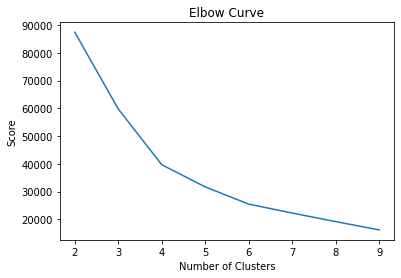

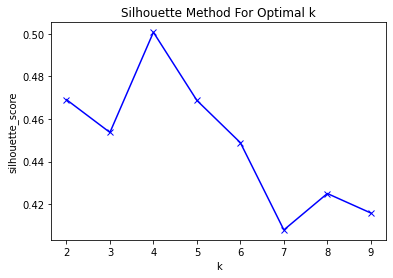

N_cluster: 2, score: 0.46906424627512594
N_cluster: 3, score: 0.4536608321882585
N_cluster: 4, score: 0.5007079483904984
N_cluster: 5, score: 0.46869941164464307
N_cluster: 6, score: 0.4379870725643565
N_cluster: 7, score: 0.4227554745988417
N_cluster: 8, score: 0.43272605019471383
N_cluster: 9, score: 0.4188620602973544


In [274]:
K_clusters = range(2,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = df_age_spending[['age']]
X_axis = df_age_spending[['spending_score']]
score = [kmeans[i].fit(df_age_income).inertia_ for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


sil = []
K_sil = range(2,10)
for k in K_sil:
    kmeans = KMeans(n_clusters = k).fit(df_age_spending)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_age_spending, labels, metric = 'euclidean')) 

#Visualization
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()


for i in range(2,10):
  kmeans_ = KMeans(n_clusters=i).fit(df_age_spending)
  labels_ = kmeans_.labels_
  coef = silhouette_score(df_age_spending,labels_)
  
  print("N_cluster: {}, score: {}".format(i,coef))

In [296]:
Y= np.array(df_age_spending)
kmeans = KMeans(n_clusters=4, random_state=1).fit(Y)
kmeans.labels_
df_age_spending['clusterlabels'] = kmeans.labels_

In [297]:
df_age_spending.head(10)

,age,spending_score,clusterlabels
0,19,39,1
1,21,81,2
2,20,6,0
3,23,77,2
4,31,40,1
5,22,76,2
6,35,6,0
7,23,94,2
8,64,3,0
9,30,72,2


In [298]:
print(kmeans.cluster_centers_)

[[ 4.32916667e+01  1.50208333e+01  1.04166667e+00]
 [ 2.73260870e+01  4.93695652e+01  1.76086957e+00]
 [ 3.01754386e+01  8.23508772e+01 -1.11022302e-15]
 [ 5.54081633e+01  4.80408163e+01  2.00000000e+00]]


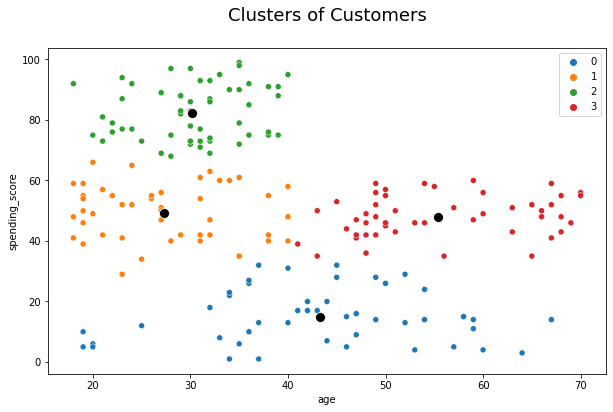

In [299]:
clusterlabels = df_age_spending['clusterlabels']
plt.figure(figsize=(10, 6))
sns.scatterplot(df_age_spending['age'], df_age_spending['spending_score'],hue=clusterlabels,palette=sns.color_palette("tab10",4))
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'black', s = 100)
plt.title('Clusters of Customers\n', fontsize = 18)
plt.show()

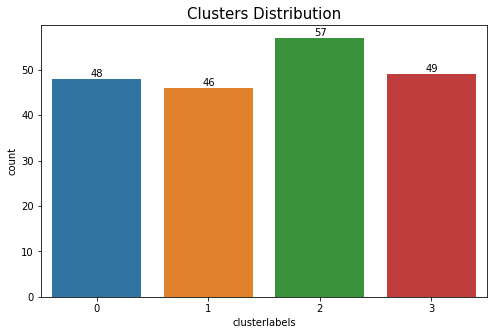

In [484]:
fig = plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_age_spending,x='clusterlabels')
for p, label in zip(ax.patches, df_age_spending['clusterlabels'].value_counts().sort_index()): 
    ax.annotate(label, (p.get_x()+0.35, p.get_height()+0.50))
plt.title('Clusters Distribution', fontsize = 15)
plt.show()

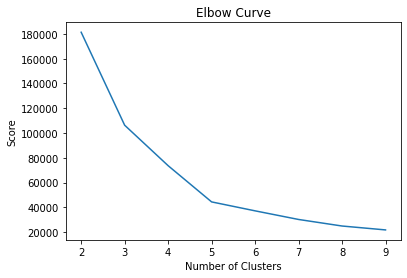

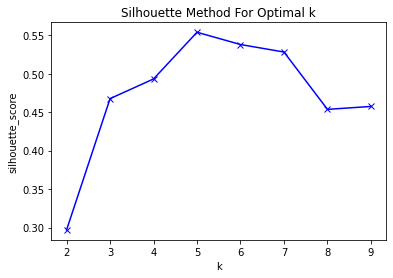

N_cluster: 2, score: 0.2968969162503008
N_cluster: 3, score: 0.46761358158775435
N_cluster: 4, score: 0.4931963109249047
N_cluster: 5, score: 0.553931997444648
N_cluster: 6, score: 0.53976103063432
N_cluster: 7, score: 0.5264283703685728
N_cluster: 8, score: 0.4575689106804838
N_cluster: 9, score: 0.4565077334305076


In [301]:
K_clusters = range(2,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = df_score_income[['spending_score']]
X_axis = df_score_income[['annual_income']]
score = [kmeans[i].fit(df_score_income).inertia_ for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


sil = []
K_sil = range(2,10)
for k in K_sil:
    kmeans = KMeans(n_clusters = k).fit(df_score_income)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_score_income, labels, metric = 'euclidean')) 

#Visualization
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()


for i in range(2,10):
  kmeans_ = KMeans(n_clusters=i).fit(df_score_income)
  labels_ = kmeans_.labels_
  coef = silhouette_score(df_score_income,labels_)
  
  print("N_cluster: {}, score: {}".format(i,coef))

In [303]:
Y = np.array(df_score_income)
kmeans = KMeans(n_clusters=5, random_state=1).fit(Y)
kmeans.labels_
df_score_income['clusterlabels'] = kmeans.labels_

In [304]:
print(kmeans.cluster_centers_)

[[79.36363636 25.72727273]
 [17.11428571 88.2       ]
 [49.51851852 55.2962963 ]
 [82.12820513 86.53846154]
 [20.91304348 26.30434783]]


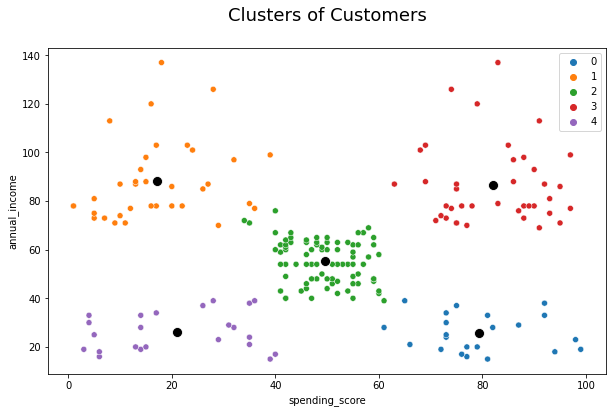

In [307]:
clusterlabels = df_score_income['clusterlabels']
plt.figure(figsize=(10, 6))
sns.scatterplot(df_score_income['spending_score'], df_score_income['annual_income'],hue=clusterlabels,palette=sns.color_palette("tab10",5))
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'black', s = 100)
plt.title('Clusters of Customers\n', fontsize = 18)
plt.show()

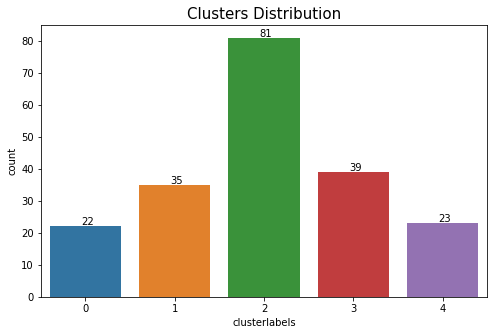

In [489]:
fig = plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_score_income,x='clusterlabels')
for p, label in zip(ax.patches, df_score_income['clusterlabels'].value_counts().sort_index()): 
    ax.annotate(label, (p.get_x()+0.35, p.get_height()+0.50))
plt.title('Clusters Distribution', fontsize = 15)
plt.show()

In [348]:
df_gender_score= df1[['gender','spending_score']]
df_gender_income= df1[['gender','annual_income']]

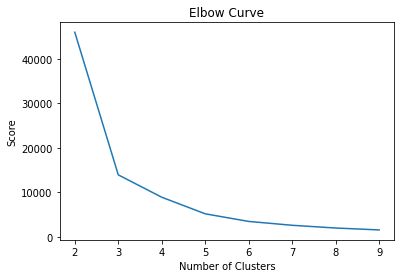

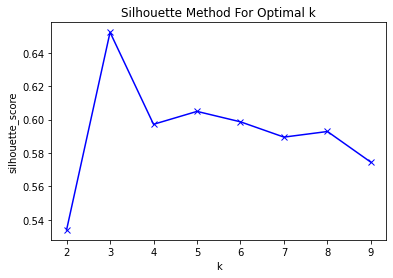

N_cluster: 2, score: 0.5296205577803835
N_cluster: 3, score: 0.6523636073255265
N_cluster: 4, score: 0.5972072360451244
N_cluster: 5, score: 0.6049443240263864
N_cluster: 6, score: 0.5986860516275994
N_cluster: 7, score: 0.5892048066760875
N_cluster: 8, score: 0.5914846761493356
N_cluster: 9, score: 0.5744626575213418


In [442]:
K_clusters = range(2,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = df_gender_score[['gender']]
X_axis = df_gender_score[['spending_score']]
score = [kmeans[i].fit(df_gender_score).inertia_ for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


sil = []
K_sil = range(2,10)
for k in K_sil:
    kmeans = KMeans(n_clusters = k).fit(df_gender_score)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_gender_score, labels, metric = 'euclidean')) 

#Visualization
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()


for i in range(2,10):
  kmeans_ = KMeans(n_clusters=i).fit(df_gender_score)
  labels_ = kmeans_.labels_
  coef = silhouette_score(df_gender_score,labels_)
  
  print("N_cluster: {}, score: {}".format(i,coef))

In [443]:
Y = np.array(df_gender_score)
kmeans = KMeans(n_clusters=3, random_state=1).fit(Y)
kmeans.labels_
df_gender_score['clusterlabels'] = kmeans.labels_

In [444]:
print(kmeans.cluster_centers_)

[[ 0.43103448 82.06896552  2.        ]
 [ 0.5106383  14.59574468  0.        ]
 [ 0.41052632 48.35789474  1.        ]]


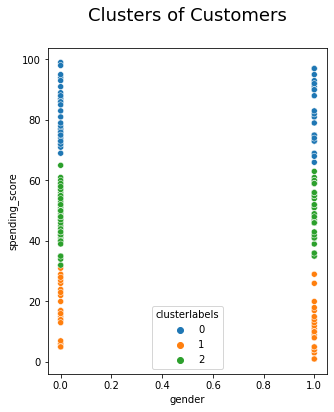

In [446]:
clusterlabels = df_gender_score['clusterlabels']
plt.figure(figsize=(5, 6))
sns.scatterplot(df_gender_score['gender'], df_gender_score['spending_score'],hue=clusterlabels,palette=sns.color_palette("tab10",3))
#sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'black', s = 100)
plt.title('Clusters of Customers\n', fontsize = 18)
plt.show()

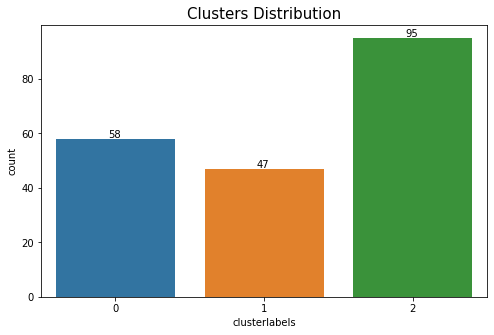

In [490]:
fig = plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_gender_score,x='clusterlabels')
for p, label in zip(ax.patches, df_gender_score['clusterlabels'].value_counts().sort_index()): 
    ax.annotate(label, (p.get_x()+0.35, p.get_height()+0.50))
plt.title('Clusters Distribution', fontsize = 15)
plt.show()

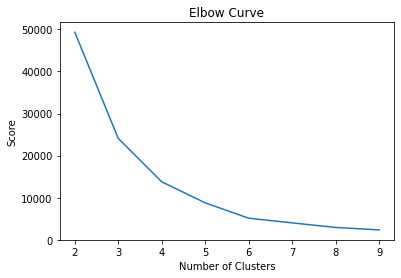

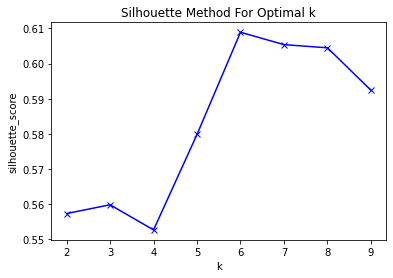

N_cluster: 2, score: 0.5573428986125637
N_cluster: 3, score: 0.5598445700688415
N_cluster: 4, score: 0.5526921653572678
N_cluster: 5, score: 0.5798400317830082
N_cluster: 6, score: 0.6089081980125964
N_cluster: 7, score: 0.6163316731327073
N_cluster: 8, score: 0.6044811418304189
N_cluster: 9, score: 0.6113713289442765


In [399]:
K_clusters = range(2,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = df_gender_income[['gender']]
X_axis = df_gender_income[['annual_income']]
score = [kmeans[i].fit(df_gender_income).inertia_ for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


sil = []
K_sil = range(2,10)
for k in K_sil:
    kmeans = KMeans(n_clusters = k).fit(df_gender_income)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_gender_income, labels, metric = 'euclidean')) 

#Visualization
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()


for i in range(2,10):
  kmeans_ = KMeans(n_clusters=i).fit(df_gender_income)
  labels_ = kmeans_.labels_
  coef = silhouette_score(df_gender_income,labels_)
  
  print("N_cluster: {}, score: {}".format(i,coef))

In [400]:
Y = np.array(df_gender_income)
kmeans = KMeans(n_clusters=6, random_state=1).fit(Y)
kmeans.labels_
df_gender_income['clusterlabels'] = kmeans.labels_
print(kmeans.cluster_centers_)

[[ 4.56521739e-01  7.43913043e+01 -1.33226763e-15]
 [ 4.37500000e-01  2.20000000e+01  1.00000000e+00]
 [ 5.00000000e-01  1.24000000e+02  2.00000000e+00]
 [ 4.54545455e-01  5.94545455e+01  3.00000000e+00]
 [ 5.00000000e-01  9.30000000e+01  4.00000000e+00]
 [ 3.57142857e-01  4.22380952e+01  5.00000000e+00]]


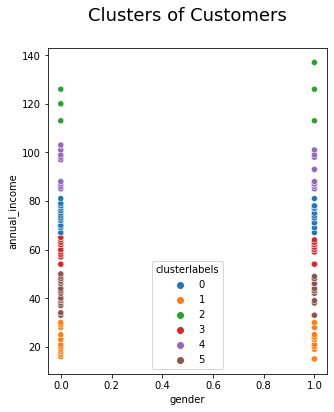

In [439]:
clusterlabels = df_gender_income['clusterlabels']
plt.figure(figsize=(5, 6))
sns.scatterplot(df_gender_income['gender'], df_gender_income['annual_income'],hue=clusterlabels,palette=sns.color_palette("tab10",6))
#sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'black', s = 100)
plt.title('Clusters of Customers\n', fontsize = 18)
plt.show()

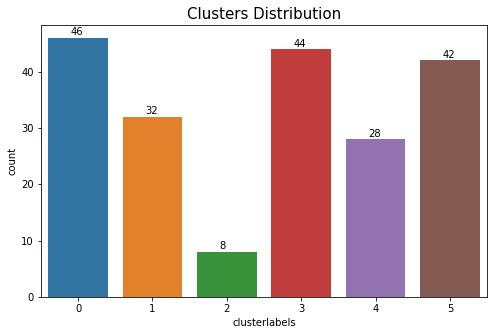

In [481]:
fig = plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_gender_income,x='clusterlabels')
for p, label in zip(ax.patches, df_gender_income['clusterlabels'].value_counts().sort_index()): 
    ax.annotate(label, (p.get_x()+0.30, p.get_height()+0.50))
plt.title('Clusters Distribution', fontsize = 15)
plt.show()

PCA

In [461]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

In [462]:
data_tx=StandardScaler().fit_transform(df1)

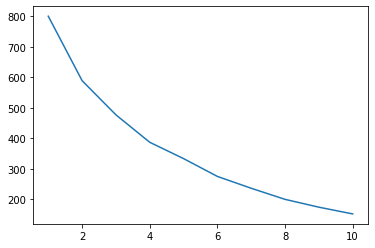

In [464]:
k_inertia=[]

for i in range(1, 11):
    km=KMeans(n_clusters=i, n_init=10, init='k-means++')
    km.fit(data_tx)
    k_inertia.append(km.inertia_)
plt.plot(range(1,11), k_inertia)

In [465]:
km=KMeans(n_clusters=5)

In [467]:
km.fit(data_tx)

KMeans(n_clusters=5)

In [468]:
cluster_centers=km.cluster_centers_
cluster_centers

array([[ 0.70840399, -0.5486456 , -0.4086195 , -0.88640526],
       [-0.74015963,  0.04751628,  0.81127593,  1.12815215],
       [-0.75387645,  0.00916066,  0.71643426, -0.88640526],
       [ 0.13472565,  1.08669522, -1.29122864,  0.27349143],
       [ 1.31794399, -0.52575662, -0.44589335,  1.12815215]])

In [469]:
clusters=km.predict(data_tx)
clusters

array([1, 1, 0, 2, 0, 2, 0, 2, 4, 2, 4, 2, 0, 2, 4, 1, 0, 1, 4, 2, 4, 1,
       0, 1, 0, 1, 0, 1, 0, 2, 4, 2, 4, 1, 0, 2, 0, 2, 0, 2, 0, 1, 4, 2,
       0, 2, 0, 2, 2, 0, 0, 1, 2, 4, 0, 4, 0, 4, 2, 4, 4, 1, 0, 0, 4, 1,
       0, 0, 1, 2, 4, 0, 0, 0, 4, 1, 0, 1, 2, 0, 4, 1, 4, 0, 2, 4, 0, 2,
       2, 0, 0, 1, 4, 0, 2, 1, 0, 2, 4, 1, 2, 0, 4, 1, 4, 2, 0, 4, 4, 4,
       4, 2, 0, 1, 2, 2, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 3, 1, 4, 1, 3, 1,
       2, 2, 3, 2, 3, 1, 3, 2, 3, 1, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3, 2,
       3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 1, 3, 1, 3, 2,
       3, 1, 3, 1, 3, 2, 3, 2, 3, 1, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1,
       3, 1])

In [470]:
pca=PCA(n_components=2)
reduced_data=pca.fit_transform(data_tx)
reduced_data

array([[-4.06382715e-01, -5.20713635e-01],
       [-1.42767287e+00, -3.67310199e-01],
       [ 5.07605706e-02, -1.89406774e+00],
       [-1.69451310e+00, -1.63190805e+00],
       [-3.13108383e-01, -1.81048272e+00],
       [-1.71744627e+00, -1.59926418e+00],
       [ 7.90821124e-01, -1.94727112e+00],
       [-2.14832159e+00, -1.50537369e+00],
       [ 2.77428623e+00, -8.82987672e-01],
       [-1.21629477e+00, -1.61640464e+00],
       [ 2.62905084e+00, -8.61237043e-01],
       [-1.68947038e+00, -1.54542784e+00],
       [ 1.68582253e+00, -2.02394479e+00],
       [-1.64607339e+00, -1.52251259e+00],
       [ 1.17443628e+00, -6.12790961e-01],
       [-1.32613070e+00, -2.36719149e-01],
       [ 1.67728253e-02, -1.74344572e+00],
       [-1.07842454e+00, -2.44715641e-01],
       [ 1.48758780e+00, -5.72676028e-01],
       [-1.66373169e+00, -1.43259774e+00],
       [ 4.88090311e-01, -3.92921145e-01],
       [-1.01895051e+00, -1.66247511e-01],
       [ 1.35891492e+00, -1.82866936e+00],
       [-7.

In [473]:
reduced_data.shape, df1.shape, clusters.shape

((200, 2), (200, 4), (200,))

In [474]:
reduced_data=pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_data.head()

,PC1,PC2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483


In [475]:
reduced_data['clusters']=clusters
reduced_data.head()

,PC1,PC2,clusters
0,-0.406383,-0.520714,1
1,-1.427673,-0.367310,1
2,0.050761,-1.894068,0
3,-1.694513,-1.631908,2
4,-0.313108,-1.810483,0


In [476]:
reduced_data['clusters'].value_counts()

2    55
0    43
1    41
3    33
4    28
Name: clusters, dtype: int64

No handles with labels found to put in legend.


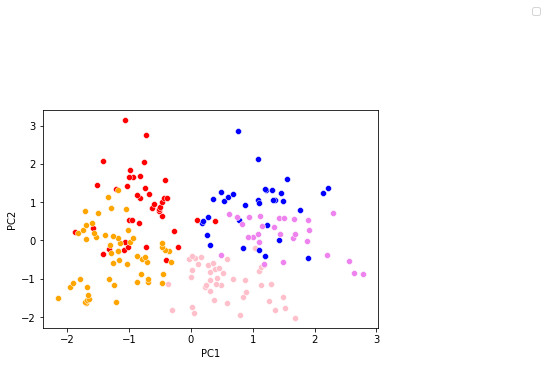

In [491]:
plt.figure(figsize=(6,4))
sns.scatterplot(reduced_data.loc[reduced_data['clusters']==0, 'PC1'], reduced_data.loc[reduced_data['clusters']==0, 'PC2'],color='pink')
sns.scatterplot(reduced_data.loc[reduced_data['clusters']==1, 'PC1'], reduced_data.loc[reduced_data['clusters']==1, 'PC2'],color='red')
sns.scatterplot(reduced_data.loc[reduced_data['clusters']==2, 'PC1'], reduced_data.loc[reduced_data['clusters']==2, 'PC2'],color='orange')
sns.scatterplot(reduced_data.loc[reduced_data['clusters']==3, 'PC1'], reduced_data.loc[reduced_data['clusters']==3, 'PC2'],color='blue')
sns.scatterplot(reduced_data.loc[reduced_data['clusters']==4, 'PC1'], reduced_data.loc[reduced_data['clusters']==4, 'PC2'],color='violet')

plt.legend(loc='best', bbox_to_anchor=(1.5, 1.5))
plt.show()

HC

In [509]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
data_t= min_max_scaler.fit_transform(df1)
data_t[0:5]

array([[0.01923077, 0.        , 0.3877551 , 1.        ],
       [0.05769231, 0.        , 0.81632653, 1.        ],
       [0.03846154, 0.00819672, 0.05102041, 0.        ],
       [0.09615385, 0.00819672, 0.7755102 , 0.        ],
       [0.25      , 0.01639344, 0.39795918, 0.        ]])

In [510]:
from sklearn.metrics.pairwise import pairwise_distances
dist_matrix = pairwise_distances(data_t,data_t) 
print(dist_matrix)

[[0.         0.43029381 1.05538015 ... 1.00888686 1.0528145  1.11639204]
 [0.43029381 0.         1.25941672 ... 0.93683095 1.20748243 1.01507247]
 [1.05538015 1.25941672 0.         ... 1.53221213 1.43245312 1.62419301]
 ...
 [1.00888686 0.93683095 1.53221213 ... 0.         0.57849818 0.13432353]
 [1.0528145  1.20748243 1.43245312 ... 0.57849818 0.         0.66437953]
 [1.11639204 1.01507247 1.62419301 ... 0.13432353 0.66437953 0.        ]]


In [511]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

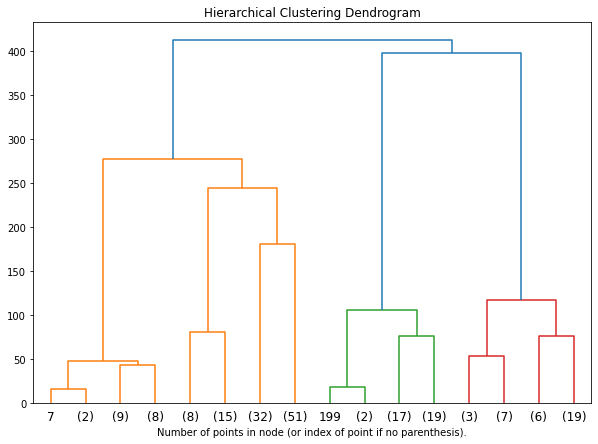

In [512]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(df1)
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [513]:
n_clusters = 5
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(df1)

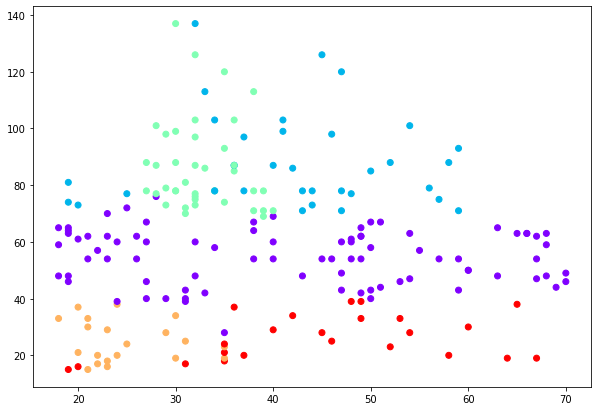

In [522]:
plt.figure(figsize=(10, 7))
plt.scatter(df1.iloc[:,0].values, df1.iloc[:,1].values, c=cluster.labels_, cmap='rainbow')
plt.show()

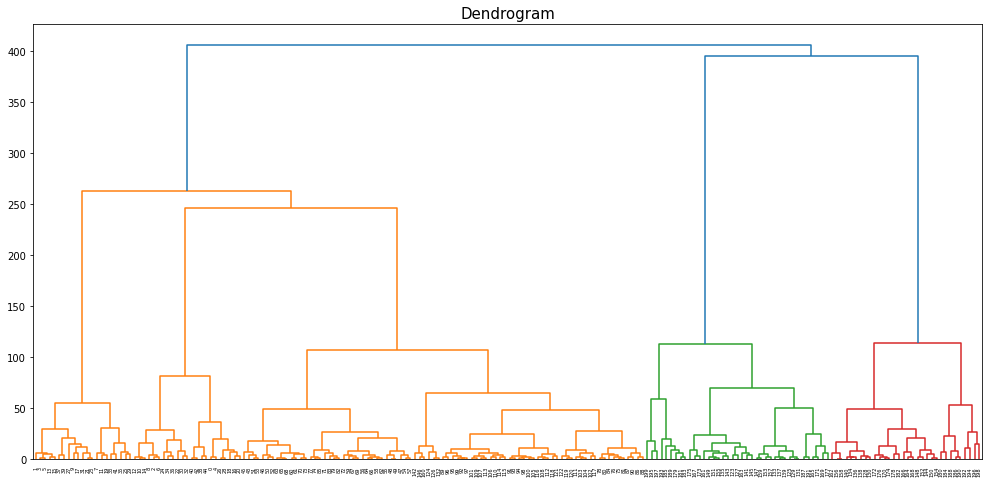

In [523]:
plt.figure(figsize = (17, 8))

dendo = dendrogram(linkage(df_score_income, method = 'ward'))
plt.title('Dendrogram', fontsize = 15)
plt.show()

In [526]:
agc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
labels = agc.fit_predict(df_score_income)

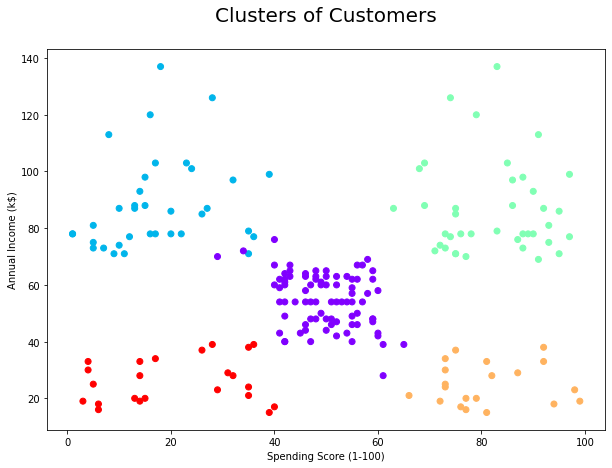

In [531]:
plt.figure(figsize=(10, 7))
plt.scatter(df_score_income.iloc[:,0].values, df_score_income.iloc[:,1].values, c=cluster.labels_, cmap='rainbow')

plt.title('Clusters of Customers\n ', fontsize = 20)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()